In [5]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# CSV 파일 불러오기
data = pd.read_csv('traffic.csv', encoding='euc-kr')

# 데이터 확인
print(data.head())  # 데이터의 처음 몇 행 출력

           날짜     합계  징수차량소계  현금징수소계  일반차량현금징수  경차현금징수  전자태그현금징수  카드(선불후불)소계  \
0  2022-01-03  65578   27083    6751      6387     364         0       20328   
1  2022-01-04  69994   28628    7588      7247     341         0       21037   
2  2022-01-05  70313   29245    7679      7332     347         0       21562   
3  2022-01-06  70634   29001    7706      7318     388         0       21294   
4  2022-01-07  71116   29163    7874      7484     390         0       21288   

   일반차량카드(선불후불)징수소계  경차카드(선불후불)징수소계  ...  쿠폰징수소계  일반차량쿠폰징수  경차쿠폰징수  전자태그쿠폰징수  \
0             19623             688  ...       4         4       0         0   
1             20310             711  ...       3         3       0         0   
2             20784             762  ...       4         4       0         0   
3             20537             738  ...       1         1       0         0   
4             20546             732  ...       1         1       0         0   

   미징수차량소계  미납차량미징수  면제차량소계  일반면제차량미징수

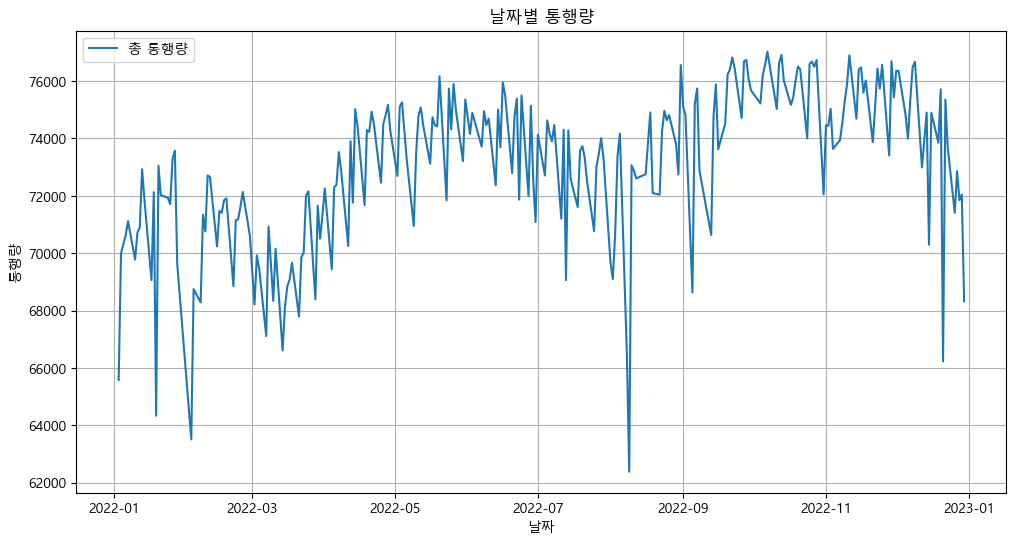

In [30]:
# 날짜를 인덱스로 설정
data['날짜'] = pd.to_datetime(data['날짜'])
data.set_index('날짜', inplace=True)

# 날짜별 통행량 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['합계'], label='총 통행량')
plt.xlabel('날짜')
plt.ylabel('통행량')
plt.title('날짜별 통행량')
plt.legend()
plt.grid(True)
plt.show()

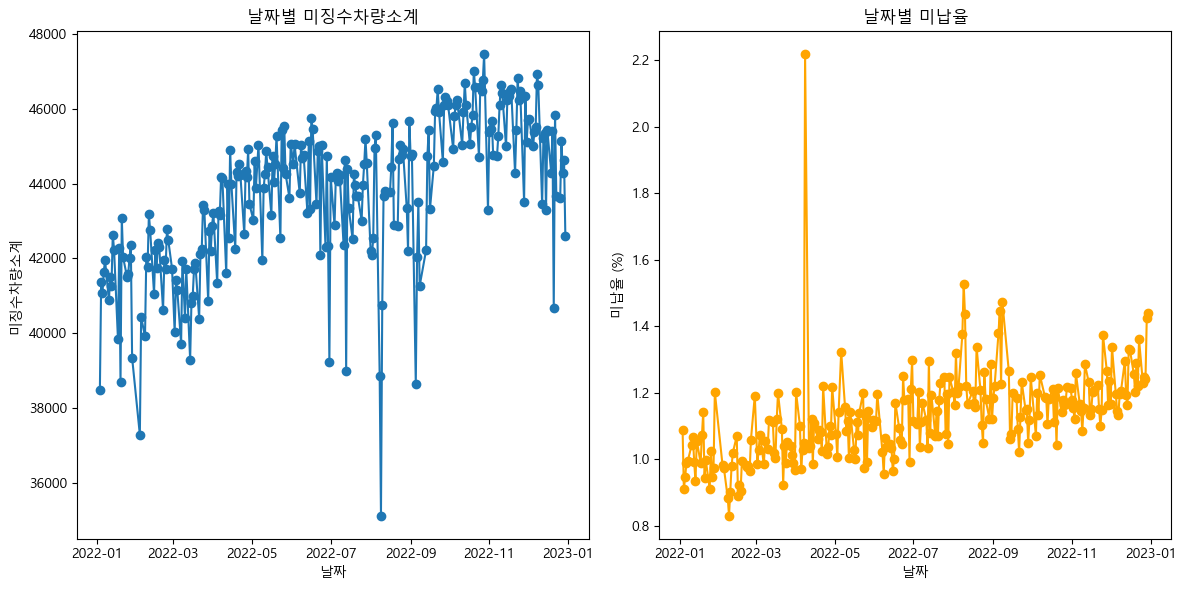

In [37]:
# '날짜' 열을 날짜형으로 변환
data['날짜'] = pd.to_datetime(data['날짜'])

# 데이터를 '날짜'로 그룹화하고 '미징수차량소계'와 '미납차량미징수'의 합계를 계산
mi_nap_by_date = data.groupby('날짜').agg({'미징수차량소계': 'sum', '미납차량미징수': 'sum'})

# 미납율 계산
mi_nap_by_date['미납율'] = (mi_nap_by_date['미납차량미징수'] / mi_nap_by_date['미징수차량소계']) * 100

# 날짜별 미징수차량소계 및 미납율 시각화
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(mi_nap_by_date.index, mi_nap_by_date['미징수차량소계'], marker='o')
plt.xlabel('날짜')
plt.ylabel('미징수차량소계')
plt.title('날짜별 미징수차량소계')

plt.subplot(122)
plt.plot(mi_nap_by_date.index, mi_nap_by_date['미납율'], marker='o', color='orange')
plt.xlabel('날짜')
plt.ylabel('미납율 (%)')
plt.title('날짜별 미납율')

plt.tight_layout()
plt.show()

In [38]:
# 미납율이 가장 높은 날짜 확인
max_unpaid_date = mi_nap_by_date['미납율'].idxmax()

print(f"미납율이 가장 높은 날짜: {max_unpaid_date}")

미납율이 가장 높은 날짜: 2022-04-08 00:00:00


In [39]:
# 모든 열에서 결측치가 있는지 확인
missing_values = data.isnull().sum()

# 결측치가 없는지 확인
if missing_values.sum() == 0:
    print("결측치가 없습니다.")
else:
    print("결측치가 있습니다.")

결측치가 없습니다.


In [44]:
from sklearn.impute import SimpleImputer
# 평균으로 결측치 대체
imputer = SimpleImputer(strategy='mean')
# 데이터프레임의 'numeric_column' 열에 결측치 대체 모델을 적용
imputer.fit(data[['환불건수']])
# 결측치를 대체한 결과를 새로운 열에 저장
data['환불건수_new'] = imputer.transform(data[['환불건수']])


In [80]:
from sklearn.preprocessing import OneHotEncoder

# traffic.csv 파일을 불러옴
data = pd.read_csv('traffic.csv', encoding='euc-kr') 

# "날짜" 열을 추출
days_of_week = data[['날짜']]

# OneHotEncoder 객체 생성
encoder = OneHotEncoder(sparse=False)

# "날짜" 열을 인코딩
encoded_data = encoder.fit_transform(days_of_week)

# 인코딩된 데이터를 데이터프레임으로 변환 (선택 사항)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(['날짜']))

# 결과를 확인
print(encoded_df)

     날짜_2022-01-03  날짜_2022-01-04  날짜_2022-01-05  날짜_2022-01-06  \
0              1.0            0.0            0.0            0.0   
1              0.0            1.0            0.0            0.0   
2              0.0            0.0            1.0            0.0   
3              0.0            0.0            0.0            1.0   
4              0.0            0.0            0.0            0.0   
..             ...            ...            ...            ...   
242            0.0            0.0            0.0            0.0   
243            0.0            0.0            0.0            0.0   
244            0.0            0.0            0.0            0.0   
245            0.0            0.0            0.0            0.0   
246            0.0            0.0            0.0            0.0   

     날짜_2022-01-07  날짜_2022-01-10  날짜_2022-01-11  날짜_2022-01-12  \
0              0.0            0.0            0.0            0.0   
1              0.0            0.0            0.0            0

C:\Users\sk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [82]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# traffic.csv 파일을 불러오기
data = pd.read_csv('traffic.csv', encoding='euc-kr') 

# 특성 선택 및 전처리
# 필요한 특성 선택 (예: '합계', '징수차량소계', ...)
selected_features = data[['합계', '징수차량소계', '현금징수소계']]

# target_scaler 객체 생성
target_scaler = StandardScaler()

# 특성 스케일링 (각 특성을 평균 0, 표준 편차 1로 조정)
scaled_features = target_scaler.fit_transform(selected_features)

# 타겟 변수 선택 및 전처리 (예: '미납차량미징수')
target_variable = data['미납차량미징수']

# 타겟 변수 스케일링
scaled_labels = target_scaler.fit_transform(target_variable.to_frame())

# LinearRegression 모델 객체 생성
model = LinearRegression()

# 모델 학습
model.fit(scaled_features, scaled_labels)

# 예측을 위한 새로운 데이터 포인트 생성 (예시로 데이터셋의 첫 번째 행을 사용)
some_new_data = scaled_features[0:1]

# 새로운 데이터에 대한 예측 생성
scaled_predictions = model.predict(some_new_data)

# 스케일링을 풀어 원래 스케일로 복원
predictions = target_scaler.inverse_transform(scaled_predictions)

# 예측 결과 출력
print(predictions)

[[436.35004724]]


Scaled Predictions: [[-0.87111013]]
Predictions (Original Scale): [[436.35004724]]


C:\Users\sk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


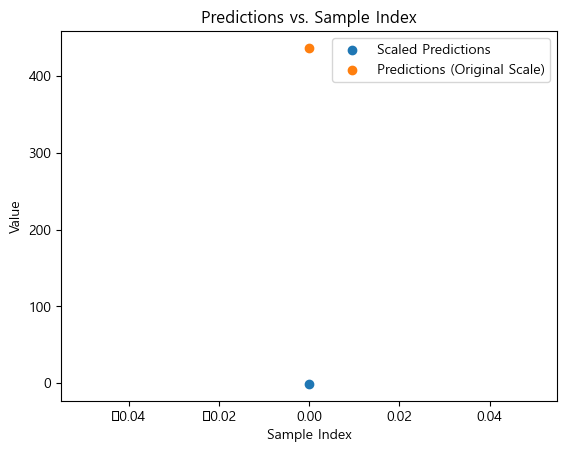

In [85]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# traffic.csv 파일을 불러오기
data = pd.read_csv('traffic.csv', encoding='euc-kr') 

# 특성 선택 및 전처리
# 필요한 특성 선택 (예: '합계', '징수차량소계', ...)
selected_features = data[['합계', '징수차량소계', '현금징수소계']]

# target_scaler 객체 생성
target_scaler = StandardScaler()

# 특성 스케일링 (각 특성을 평균 0, 표준 편차 1로 조정)
scaled_features = target_scaler.fit_transform(selected_features)

# 타겟 변수 선택 및 전처리 (예: '미납차량미징수')
target_variable = data['미납차량미징수']

# 타겟 변수 스케일링
scaled_labels = target_scaler.fit_transform(target_variable.to_frame())

# LinearRegression 모델 객체 생성
model = LinearRegression()

# 모델 학습
model.fit(scaled_features, scaled_labels)

# 예측을 위한 새로운 데이터 포인트 생성 (예시로 데이터셋의 첫 번째 행을 사용)
some_new_data = scaled_features[0:1]

# 새로운 데이터에 대한 예측 생성
scaled_predictions = model.predict(some_new_data)

# 스케일링을 풀어 원래 스케일로 복원
predictions = target_scaler.inverse_transform(scaled_predictions)

# 예측 결과 출력
print("Scaled Predictions:", scaled_predictions)
print("Predictions (Original Scale):", predictions)

# 예측 결과 시각화
plt.scatter(range(len(scaled_predictions)), scaled_predictions, label='Scaled Predictions')
plt.scatter(range(len(predictions)), predictions, label='Predictions (Original Scale)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.title('Predictions vs. Sample Index')
plt.show()


In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# traffic.csv 파일을 불러옴
data = pd.read_csv('traffic.csv', encoding='euc-kr') 

# 사용자 정의 변환기를 정의
class StandardScalerClone:
    def __init__(self, with_mean=True):
        self.with_mean = with_mean
        self.mean_ = None
        self.scale_ = None

    def fit(self, X):
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        return self

    def transform(self, X):
        if self.with_mean:
            return (X - self.mean_) / self.scale_
        else:
            return X / self.scale_

# 사용자 정의 변환기 객체 생성
custom_transformer = StandardScalerClone()

# 사용자 정의 변환기를 사용하여 특성 선택
selected_features = data[['합계', '징수차량소계']]

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test = train_test_split(selected_features, test_size=0.2, random_state=42)

# 사용자 정의 변환기 객체를 훈련 데이터에 맞게 학습
custom_transformer.fit(X_train)

# 훈련 데이터에 변환기를 적용하여 특성 스케일링
X_train_scaled = custom_transformer.transform(X_train)

# 테스트 데이터에 변환기를 적용하여 특성 스케일링
X_test_scaled = custom_transformer.transform(X_test)

# 스케일링된 데이터 출력
print(X_train_scaled)
print(X_test_scaled)

           합계    징수차량소계
154  0.636306 -0.162311
211  1.371323  0.918308
118  0.723624  0.851851
195  1.226530  0.023406
240  0.800994  0.047076
..        ...       ...
106  0.557831  0.426704
14  -0.425877  0.474954
92   0.456512  0.403034
179  0.565568  0.606048
102  0.631148  0.348411

[197 rows x 2 columns]
           합계    징수차량소계
33  -0.747516 -0.239693
6   -0.908520 -0.244245
181  1.314217  0.890997
86   0.593568  0.965648
155 -0.398613 -0.249707
178  1.207004  0.971110
194  1.038263  0.644284
104  0.654359  0.413959
9   -0.484089  0.148128
234  0.634832  0.068015
231  1.288427  0.519563
213  1.186740  0.634270
237  0.248350  0.083491
173  0.165821  0.766275
66   0.267140  0.399393
222  0.083293  0.386647
219  1.201109  0.143576
15  -0.459772  0.862775
182  1.062948  0.349322
24  -0.891572 -0.439066
120 -0.771464  2.163705
19  -1.310476  0.733501
112 -0.142554 -0.114061
67  -0.522405 -0.222396
221  1.248636  0.568723
156 -0.419982 -0.261542
199  1.290637  0.677968
10  -1.517902 -0

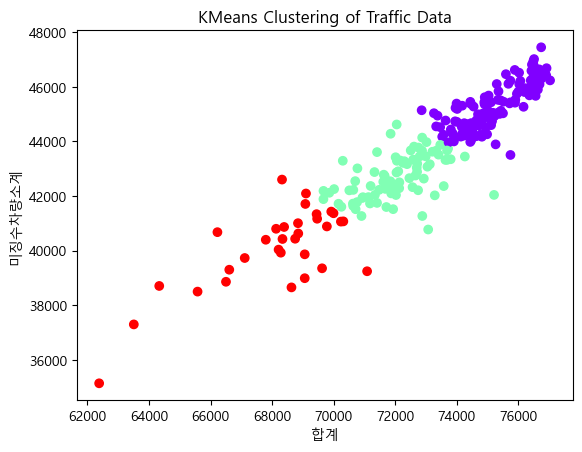

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# traffic.csv 파일을 로드
data = pd.read_csv('traffic.csv', encoding='euc-kr') 

# 필요한 특성 선택 (예시로 '합계'와 '미징수차량소계' 사용)
selected_features = data[['합계', '미징수차량소계']]

# 특성 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_features)

# 클러스터 할당 결과
labels = kmeans.labels_

# 클러스터링 결과 시각화
plt.scatter(selected_features['합계'], selected_features['미징수차량소계'], c=labels, cmap='rainbow')
plt.xlabel('합계')
plt.ylabel('미징수차량소계')
plt.title('KMeans Clustering of Traffic Data')
plt.show()

In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# traffic.csv 파일을 불러옴
data = pd.read_csv('traffic.csv', encoding='euc-kr') 

# Feature Engineering 및 결측치 처리를 위한 파이프라인
numeric_features = ['합계', '징수차량소계']  # 수치형 특성
categorical_features = ['날짜']  # 범주형 특성

# 파이프라인 정의
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # 결측값 처리
    ('scaler', StandardScaler()),  # 수치형 특성 표준화
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # 결측값 처리
    ('onehot', OneHotEncoder(sparse=False)),  # 범주형 특성 원-핫 인코딩
])

# ColumnTransformer를 사용하여 특성 구성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# 전체 파이프라인 구축
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# traffic.csv 파일에 파이프라인을 적용하여 데이터 전처리
preprocessed_data = pipeline.fit_transform(data)

# preprocessed_data를 데이터프레임으로 변환하여 결과 확인
preprocessed_df = pd.DataFrame(preprocessed_data)

# 결과 데이터프레임 출력
print(preprocessed_df)

          0         1    2    3    4    5    6    7    8    9    ...  239  \
0   -2.820970 -2.216716  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1   -1.172916 -0.783375  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2   -1.053865 -0.210966  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3   -0.934067 -0.437332  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
4   -0.754184 -0.287040  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
..        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
242 -0.645583 -1.551534  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
243 -0.104442 -1.628536  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
244 -0.480628 -1.764912  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
245 -0.407108 -1.897577  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
246 -1.797281 -3.480282  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

     240  241  242  243  244  245  246  247  248  
0    0.0  0.0  0.0  0.0 

In [79]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer

# traffic.csv 파일을 불러옴
data = pd.read_csv('traffic.csv', encoding='euc-kr') 

# 사용자 정의 변환기를 정의
class StandardScalerClone:
    def __init__(self, with_mean=True):
        self.with_mean = with_mean
        self.mean_ = None
        self.scale_ = None

    def fit(self, X):
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        return self

    def transform(self, X):
        if self.with_mean:
            return (X - self.mean_) / self.scale_
        else:
            return X / self.scale_

# 사용자 정의 변환기 객체 생성
custom_transformer = StandardScalerClone()

# 특성 선택
selected_features = data[['합계', '징수차량소계']]

# 타겟 변수 선택 (타겟 변수 이름은 실제 데이터에 따라 변경해야 함)
selected_target = data['미납차량미징수']

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(selected_features, selected_target, test_size=0.2, random_state=42)

# 사용자 정의 변환기 객체를 훈련 데이터에 맞게 학습
custom_transformer.fit(X_train)

# 훈련 데이터에 변환기를 적용하여 특성 스케일링
X_train_scaled = custom_transformer.transform(X_train)

# 테스트 데이터에 변환기를 적용하여 특성 스케일링
X_test_scaled = custom_transformer.transform(X_test)

# 스케일링된 데이터 출력
print(X_train_scaled)
print(X_test_scaled)

# 모델 선택과 훈련
forest_reg = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

# RMSE 값을 계산하기 위한 함수
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# 10-폴드 교차 검증을 통해 RMSE 계산
forest_rmses = cross_val_score(forest_reg, selected_features, selected_target, scoring=rmse_scorer, cv=10)

# RMSE 값의 요약 통계 정보 출력
rmse_series = pd.Series(forest_rmses)
rmse_summary = rmse_series.describe()
print("RMSE Summary:")
print(rmse_summary)

# 훈련된 모델을 사용하여 예측 수행
forest_reg.fit(X_train_scaled, y_train)
predictions = forest_reg.predict(X_test_scaled)

# 모델의 성능 측정 (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE on Test Data:", rmse)


           합계    징수차량소계
154  0.636306 -0.162311
211  1.371323  0.918308
118  0.723624  0.851851
195  1.226530  0.023406
240  0.800994  0.047076
..        ...       ...
106  0.557831  0.426704
14  -0.425877  0.474954
92   0.456512  0.403034
179  0.565568  0.606048
102  0.631148  0.348411

[197 rows x 2 columns]
           합계    징수차량소계
33  -0.747516 -0.239693
6   -0.908520 -0.244245
181  1.314217  0.890997
86   0.593568  0.965648
155 -0.398613 -0.249707
178  1.207004  0.971110
194  1.038263  0.644284
104  0.654359  0.413959
9   -0.484089  0.148128
234  0.634832  0.068015
231  1.288427  0.519563
213  1.186740  0.634270
237  0.248350  0.083491
173  0.165821  0.766275
66   0.267140  0.399393
222  0.083293  0.386647
219  1.201109  0.143576
15  -0.459772  0.862775
182  1.062948  0.349322
24  -0.891572 -0.439066
120 -0.771464  2.163705
19  -1.310476  0.733501
112 -0.142554 -0.114061
67  -0.522405 -0.222396
221  1.248636  0.568723
156 -0.419982 -0.261542
199  1.290637  0.677968
10  -1.517902 -0